In [1]:
import numpy as np     #Importing numpy package
import pandas as pd    #Importing pandas package
import seaborn as sns  #Importing seaborn package
import sklearn         #Importing sklearn package
import matplotlib.pyplot as plt   #Importing matplotlib package
%matplotlib inline

In [2]:
data = pd.read_csv("C:\\Users\\Rohan Kumar\\Downloads\\Indian_Forest_Fires_Dataset.CSV")   #Reading the dataset from drive
data   #Displaying the dataframe

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [3]:
data.shape   #To display the shape of dataframe--> no of rows and columns

(517, 13)

In [4]:
data.columns   #Displaying the column names

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [5]:
print(len(data.select_dtypes(include=['object']).columns))    #Displaying no of categorical columns
print(len(data.select_dtypes(include=['int64','float64']).columns))    #Displaying no of numerical columns
print(len(data.select_dtypes(include=['bool']).columns))      #Displaying boolean columns

2
11
0


In [6]:
data.dtypes   #Displaying datatypes of each column

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [7]:
data.info()     #Displaying info about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [8]:
data.isnull().sum()   ### checking null values

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [9]:
data.duplicated()     # Checking duplicated values

0      False
1      False
2      False
3      False
4      False
       ...  
512    False
513    False
514    False
515    False
516    False
Length: 517, dtype: bool

In [10]:
data.nunique()   ### checking unique values

X          9
Y          7
month     12
day        7
FFMC     106
DMC      215
DC       219
ISI      119
temp     192
RH        75
wind      21
rain       7
area     251
dtype: int64

In [11]:
data.describe()      #Description of the dataframe

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [12]:
data.describe(include=['object'])     #Description of categorical columns

,month,day
count,517,517
unique,12,7
top,aug,sun
freq,184,95


In [13]:
data.isna().sum()    ### checking missing values

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [14]:
import missingno as msno    #Importing missingno package

<Axes: >

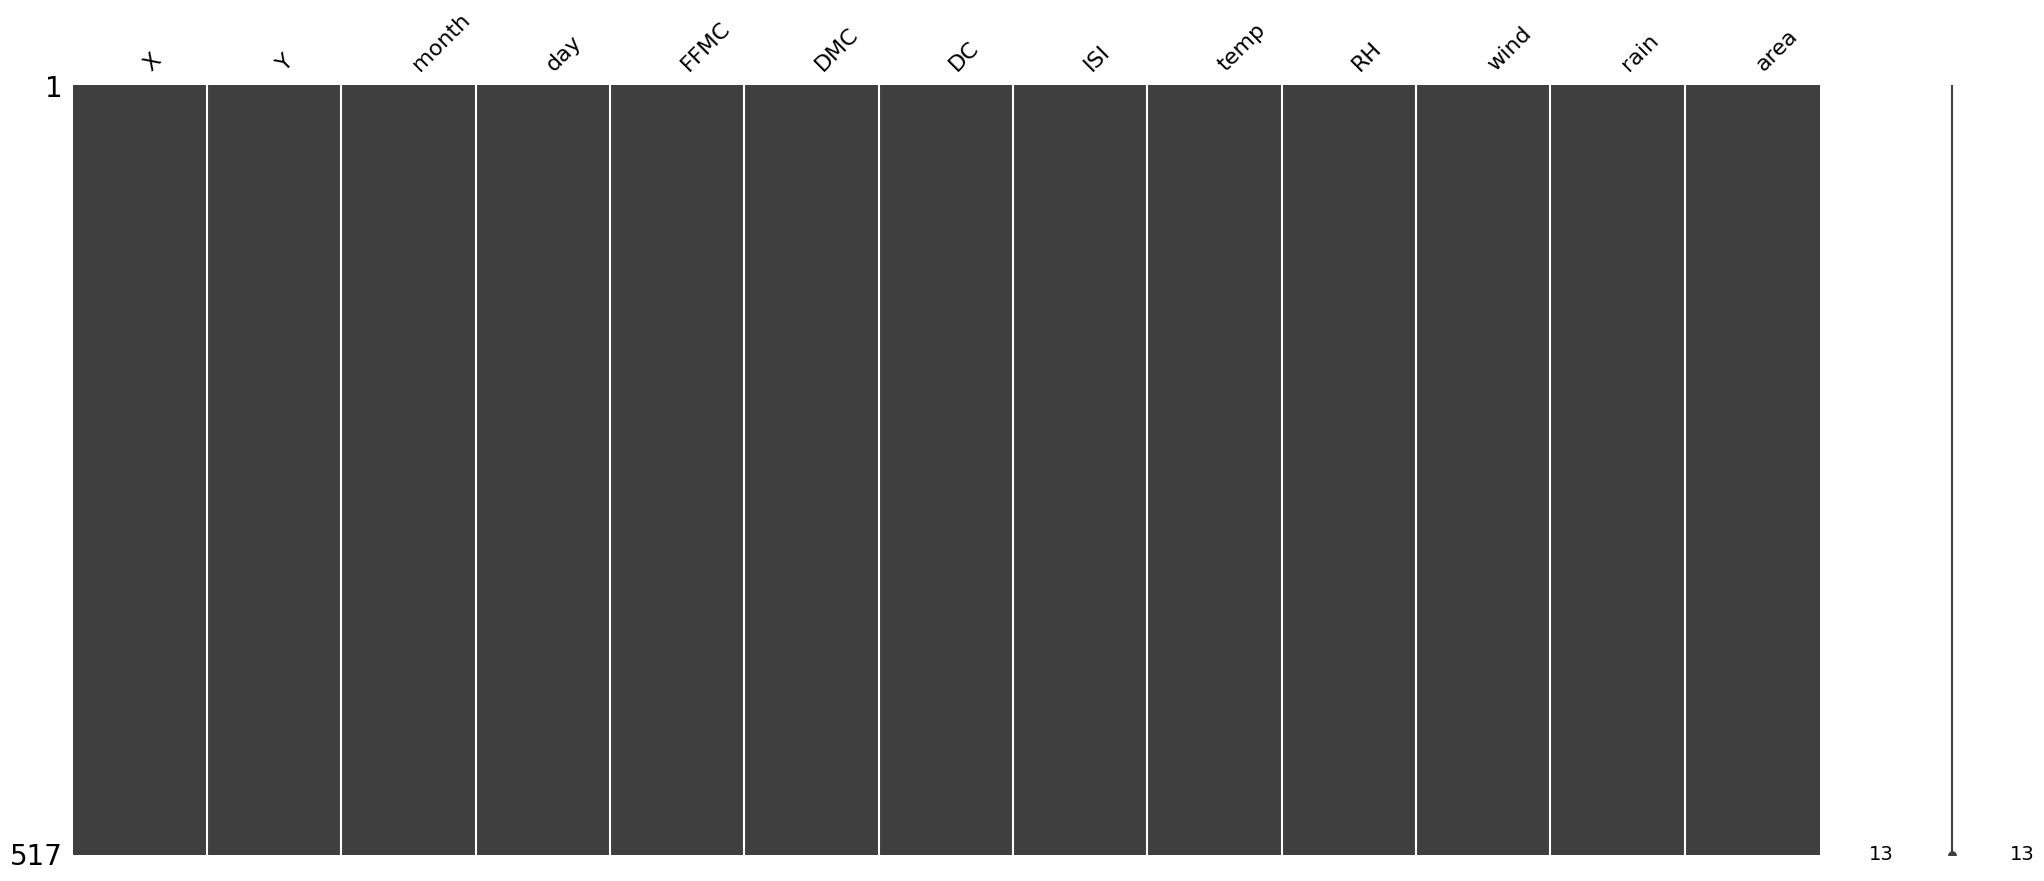

In [15]:
msno.matrix(data)       #To display missing no in a matrix

<Axes: >

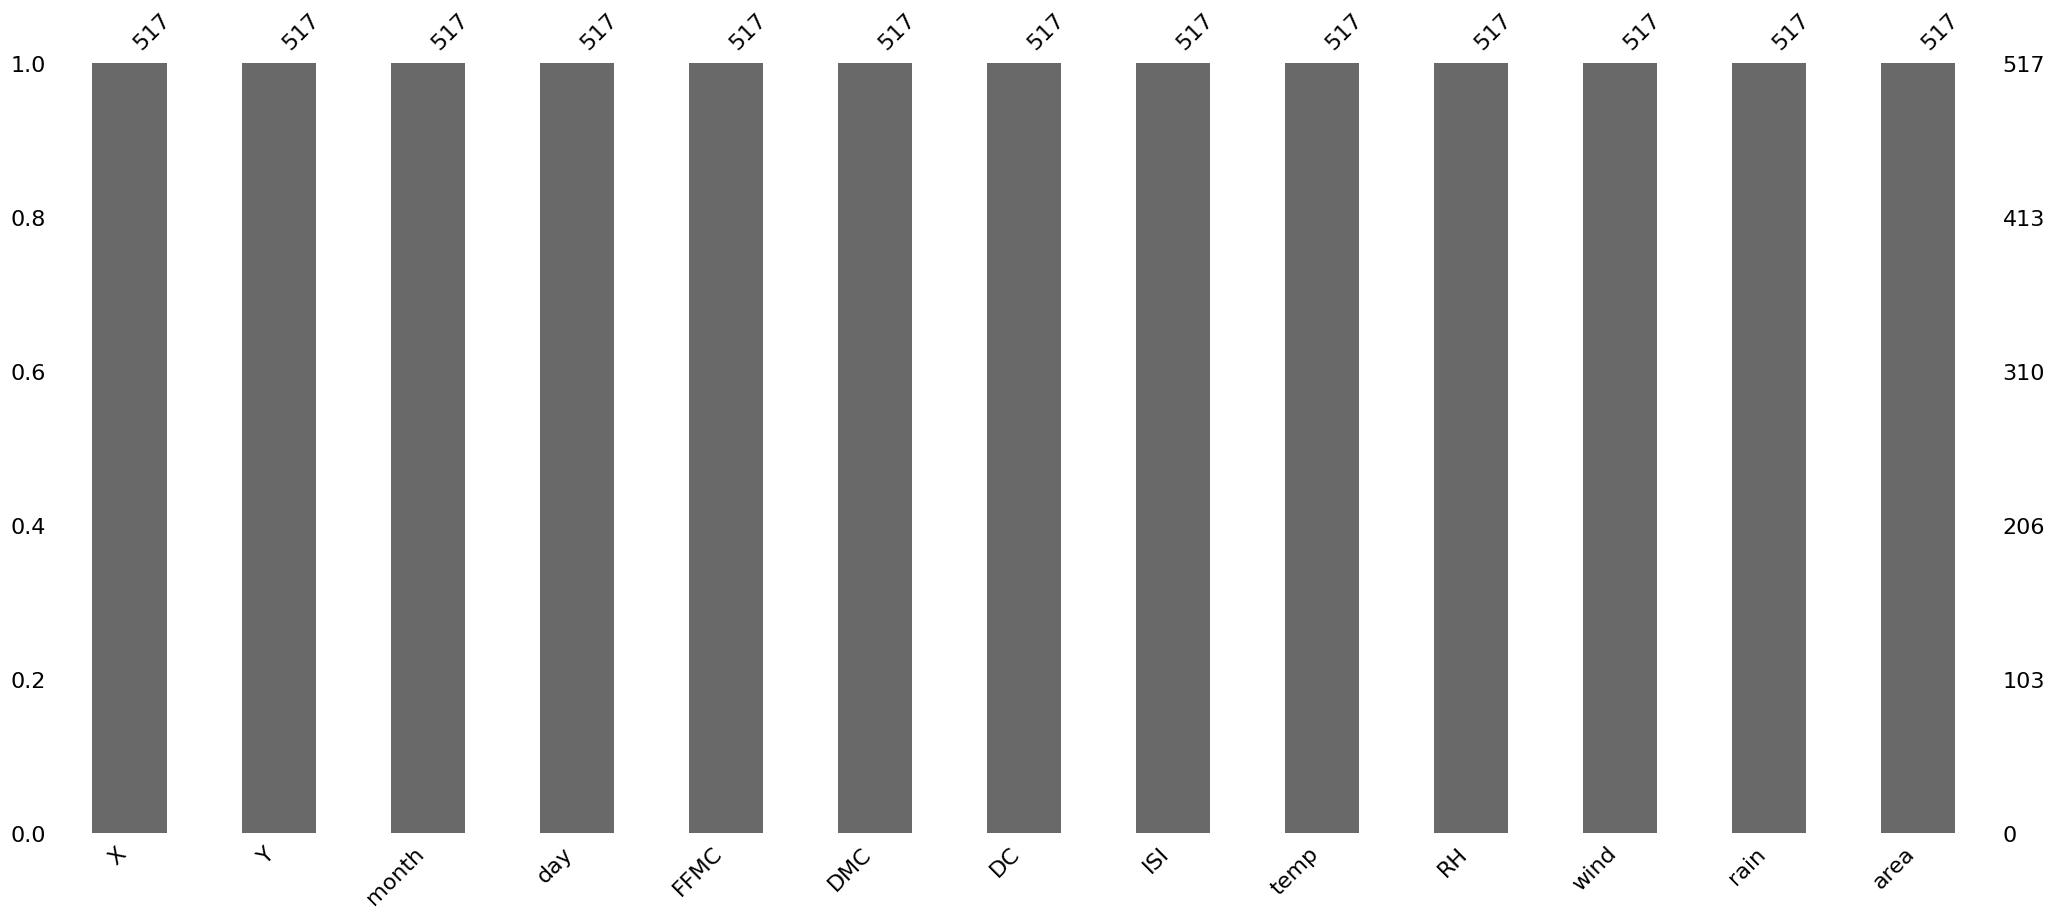

In [16]:
msno.bar(data)    #To display missing values in bar plot

array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>],
       [<Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>, <Axes: >]], dtype=object)

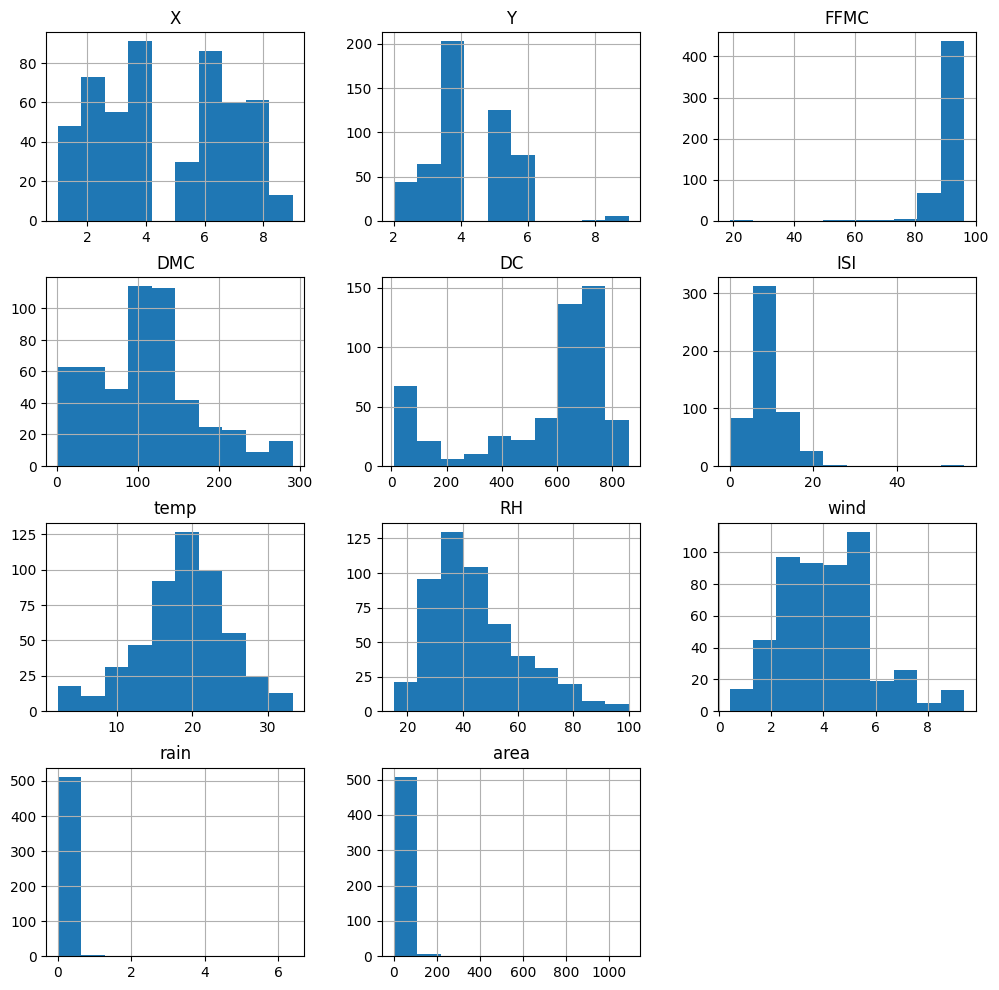

In [17]:
data.hist(figsize=(12,12))       #To display the histogram of all the columns

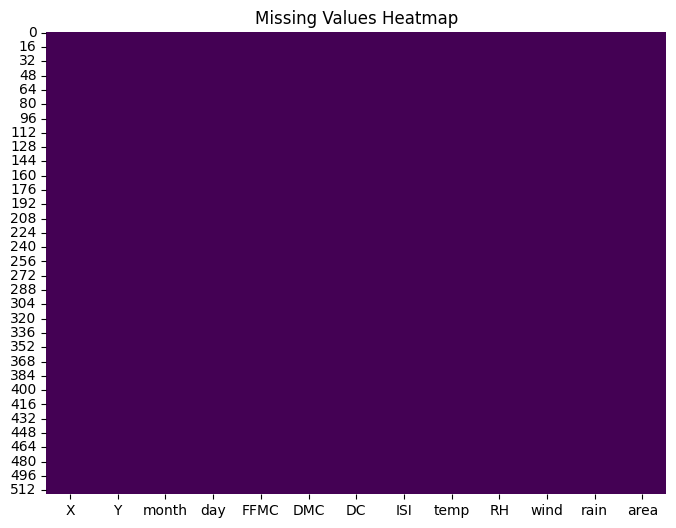

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is already defined
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)  # Set the colormap and disable color bar
plt.title('Missing Values Heatmap')  # Set the title of the plot
plt.show()


<Axes: >

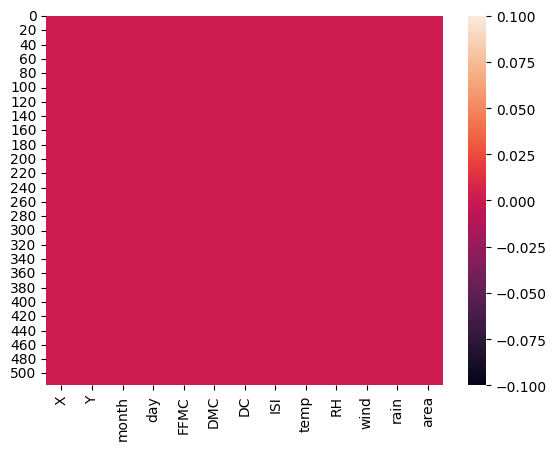

In [19]:
# Visualizing the missing values with heatmap
sns.heatmap(data.isna())

In [20]:
data['Log-area']=np.log10(data['area']+1)    #To find the log of the column area

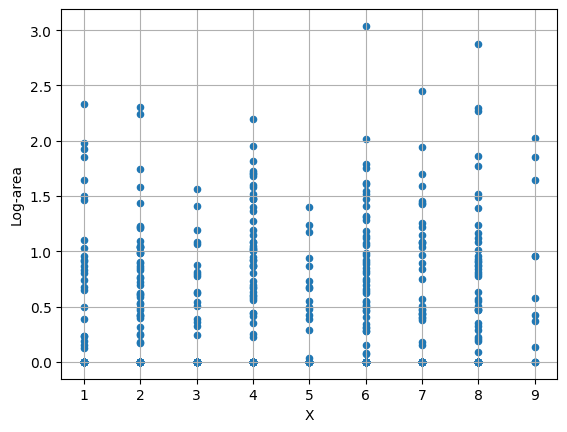

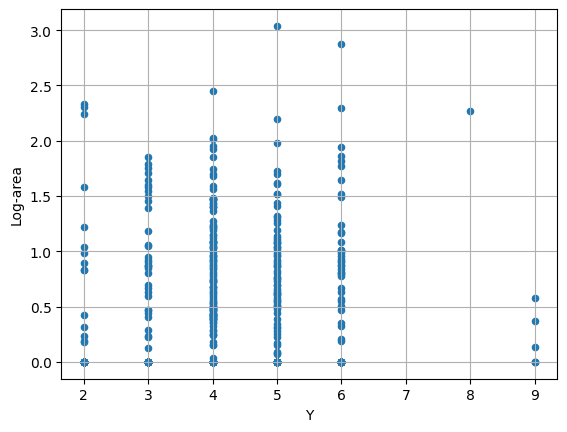

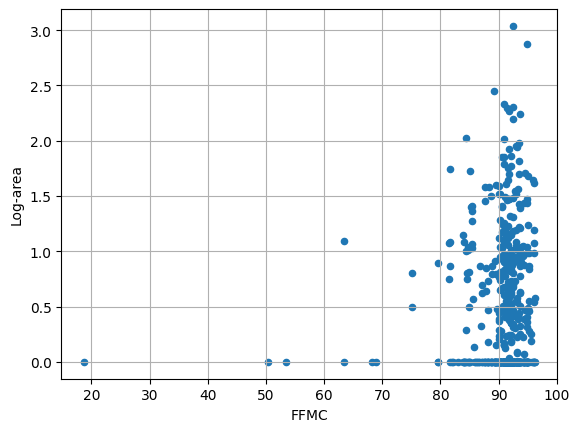

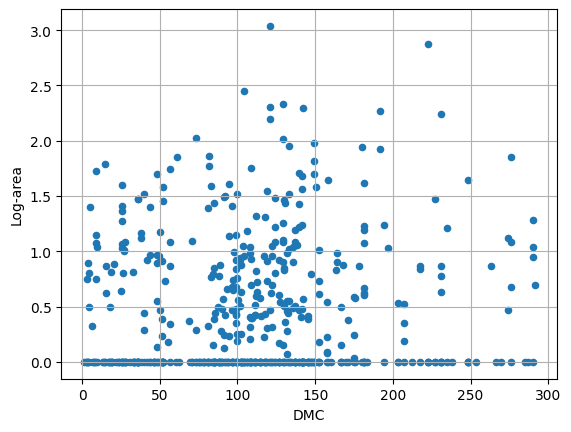

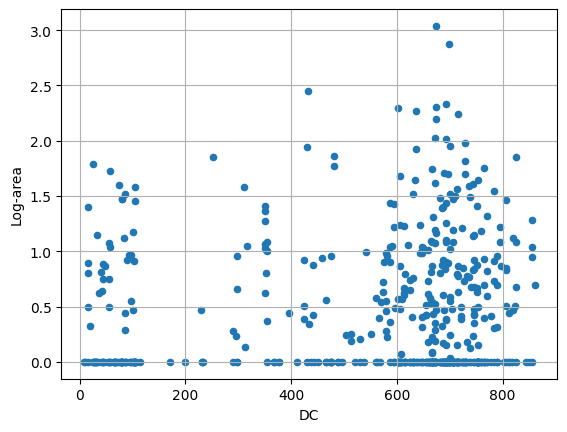

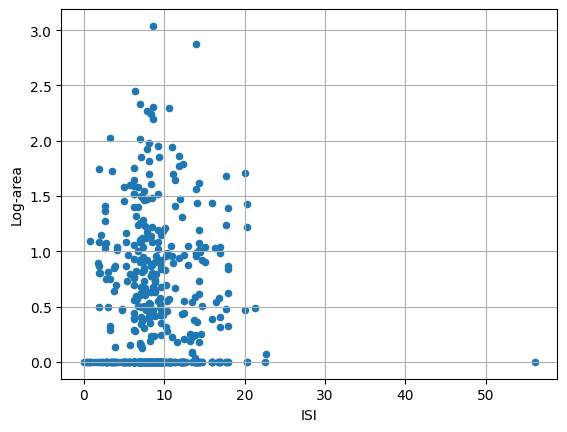

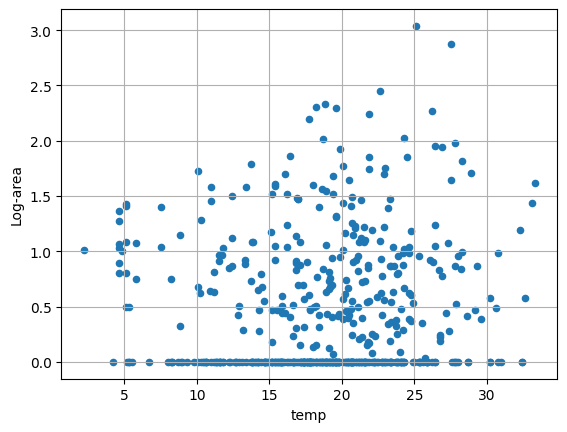

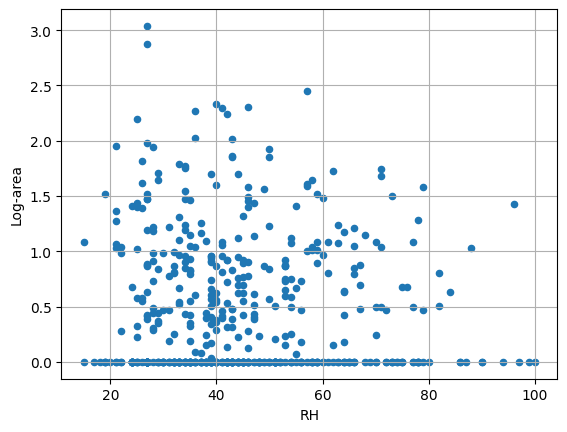

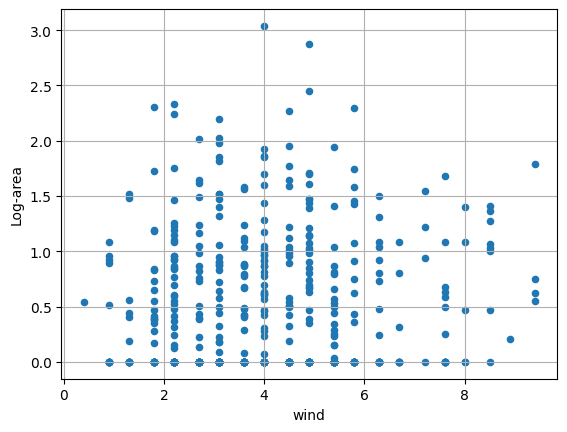

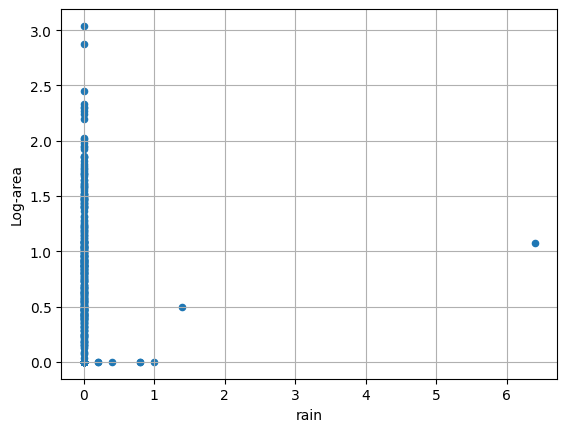

In [21]:
for i in data.describe().columns[:-2]:
    data.plot.scatter(i,'Log-area',grid=True)    #Display the scatter plot with x-axis as columns and y-axis as log area column

<Axes: title={'center': 'Log-area'}, xlabel='day'>

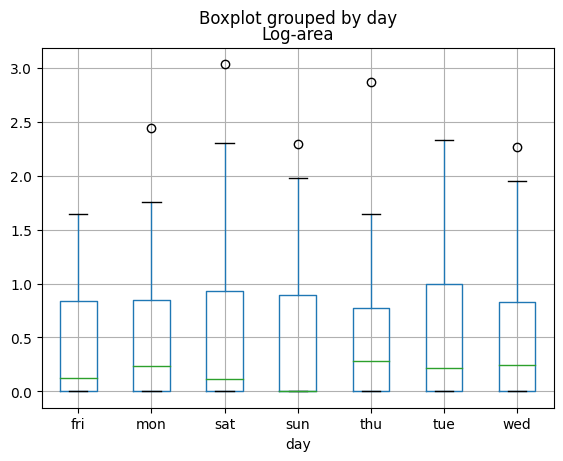

In [22]:
data.boxplot(column='Log-area',by='day')     #Boxplot which shows the how categorical column "day" affect the outcome

<Axes: title={'center': 'Log-area'}, xlabel='month'>

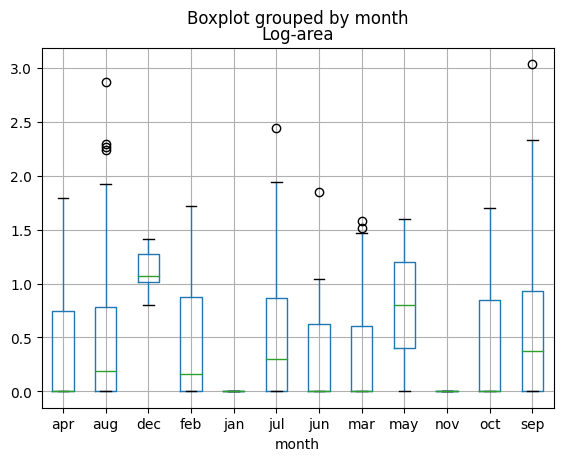

In [23]:
data.boxplot(column='Log-area',by='month')      #Boxplot which shows the how categorical column "month" affect the outcome

C:\Users\Rohan Kumar\AppData\Local\Temp\ipykernel_13852\4275852906.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cax = ax.matshow(data.corr(), vmin=-1, vmax=1)


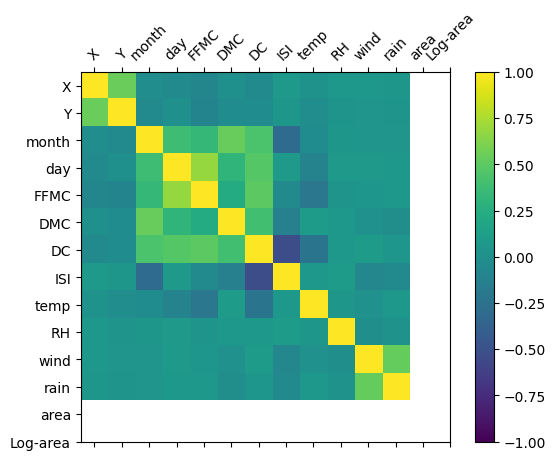

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is already defined
fig = plt.figure()
ax = fig.add_subplot(111)    ## Adding the subplot
cax = ax.matshow(data.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)     ## Color of the bar

# Adjusting ticks and labels
ticks = np.arange(0, len(data.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns, rotation=45)    # Displaying names on the x-axis with rotation for better visibility
ax.set_yticklabels(data.columns)

plt.show()


In [25]:
data['month']    #Encoding the categorical column 'month'

0      mar
1      oct
2      oct
3      mar
4      mar
      ... 
512    aug
513    aug
514    aug
515    aug
516    nov
Name: month, Length: 517, dtype: object

In [26]:
## Coverting the categorical data into numerical columns using get_dummies
dummy_set = pd.get_dummies(data.month)
dummy_set    #Display the dummy_set

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,0,1,0,0,0,0,0,0,0,0,0,0
513,0,1,0,0,0,0,0,0,0,0,0,0
514,0,1,0,0,0,0,0,0,0,0,0,0
515,0,1,0,0,0,0,0,0,0,0,0,0


In [27]:
data['day']   #Encoding the categorical column 'day'

0      fri
1      tue
2      sat
3      fri
4      sun
      ... 
512    sun
513    sun
514    sun
515    sat
516    tue
Name: day, Length: 517, dtype: object

In [28]:
dummy_set1 = pd.get_dummies(data.day)   ## Coverting the categorical data into numerical columns using get_dummies
dummy_set1 #Display the dummy_set

,fri,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
512,0,0,0,1,0,0,0
513,0,0,0,1,0,0,0
514,0,0,0,1,0,0,0
515,0,0,1,0,0,0,0


In [29]:
# Concatenating the original dataframe and dataframe of dummy columns
merged_data = pd.concat([data, dummy_set, dummy_set1 ], axis=1)
merged_data    #Displaying the merged data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,nov,oct,sep,fri,mon,sat,sun,thu,tue,wed
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,...,0,0,0,1,0,0,0,0,0,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,...,0,1,0,0,0,0,0,0,1,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,...,0,1,0,0,0,1,0,0,0,0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,...,0,0,0,1,0,0,0,0,0,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,...,0,0,0,0,0,0,1,0,0,0
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,...,0,0,0,0,0,0,1,0,0,0
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,...,0,0,0,0,0,0,1,0,0,0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,...,0,0,0,0,0,1,0,0,0,0


In [30]:
# Creating dummy columns and dropping the dummy column
pd.get_dummies(data, columns=['month','day'], drop_first=True)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,1,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,1,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,1,0,0,0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,1,0,0,0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,1,0,0,0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [31]:
from sklearn.model_selection import train_test_split    #Importing train_test_split from sklearn model selection
from sklearn.preprocessing import OneHotEncoder         #Importing OneHotEncoder from sklearn preprocessing
from sklearn.preprocessing import LabelEncoder          #Importing LabelEncoder from sklearn preprocessing

In [32]:
enc = LabelEncoder()
enc.fit(data['month'])    ## month column

LabelEncoder()

In [33]:
enc.classes_    #Encoding classes of month column

array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype=object)

In [34]:
data['month_encoded']=enc.transform(data['month'])    #Transforming the encoded month column
data.head() 

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Log-area,month_encoded
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0,7
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0,10
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0,10
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0,7
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0,7


In [35]:
test_size=0.4    #Test size

In [36]:
X = data.drop(['area','Log-area','month','day'], axis=1)   #Splitting the dataset to X by dropping the columns area,logarea,month,day
X.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,month_encoded
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,7
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,10
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,10
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,7
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,7


In [37]:
y = data['Log-area']     #Splitting the dataset to y by dropping the columns logarea
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Log-area, dtype: float64

In [38]:
# Preparing Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
                                                    random_state= 156)

In [39]:
print(X_train.shape)    #To display the X_train shape
print(X_test.shape)     #To display the X_test shape
print(y_train.shape)    #To display the y_train shape
print(y_test.shape)     #To display the y_test shape
X_train     #Displaying the X_train

(310, 11)
(207, 11)
(310,)
(207,)


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,month_encoded
293,7,6,93.1,180.4,430.8,11.0,26.9,28,5.4,0.0,5
390,7,4,84.7,9.5,58.3,4.1,7.5,71,6.3,0.0,3
237,1,2,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,11
337,6,3,91.6,108.4,764.0,6.2,23.0,34,2.2,0.0,11
453,4,5,89.4,266.2,803.3,5.6,17.4,54,3.1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
279,4,4,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,2
55,4,3,92.9,137.0,706.4,9.2,27.7,24,2.2,0.0,11
10,7,5,92.5,88.0,698.6,7.1,17.8,51,7.2,0.0,11
485,2,4,95.0,135.5,596.3,21.3,30.6,28,3.6,0.0,1


In [40]:
def rec(m,n,tol):      #Defining rec
    if type(m)!='numpy.ndarray':
        m=np.array(m)
    if type(n)!='numpy.ndarray':
        n=np.array(n)
    l=m.size       #Assigning m.size to l
    percent = 0
    for i in range(l):
        if np.abs(10**m[i]-10**n[i])<=tol:
            percent+=1
    return 100*(percent/l)   #Returning (100*percent/l) value

In [41]:
tol_max=20    # Assigning Maxvalue

In [42]:
from sklearn.ensemble import RandomForestRegressor     #Importing Random Forest Regressor package from sklearn ensemble
from sklearn.model_selection import GridSearchCV       #Importing GridSearchCV package from sklearn.model_selection

In [43]:
# Parameter grid for the Grid Search
param_grid = {'C': [0.01,0.1,1, 10], 'epsilon': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [44]:
param_grid = {'max_depth': [5,10,15,20,50], 'max_leaf_nodes': [2,5,10], 'min_samples_leaf': [2,5,10],
             'min_samples_split':[2,5,10]}
grid_RF = GridSearchCV(RandomForestRegressor(),param_grid,refit=True,verbose=0,cv=5)            
grid_RF.fit(X_train,y_train)     #Fitting the X_train and y_train in the model

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20, 50],
                         'max_leaf_nodes': [2, 5, 10],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 5, 10]})

In [45]:
print("Best parameters obtained by Grid Search:",grid_RF.best_params_)      #Displaying the best parameters obtained by Grid Search

Best parameters obtained by Grid Search: {'max_depth': 10, 'max_leaf_nodes': 2, 'min_samples_leaf': 10, 'min_samples_split': 5}


In [46]:
a=grid_RF.predict(X_test)     #Predicting the X_test by grid rf
rmse_rf=np.sqrt(np.mean((y_test-a)**2))     #RMSE formula
print("RMSE for Random Forest:",rmse_rf)    #Printing the Rmse value for random forest

RMSE for Random Forest: 0.6287645564256358


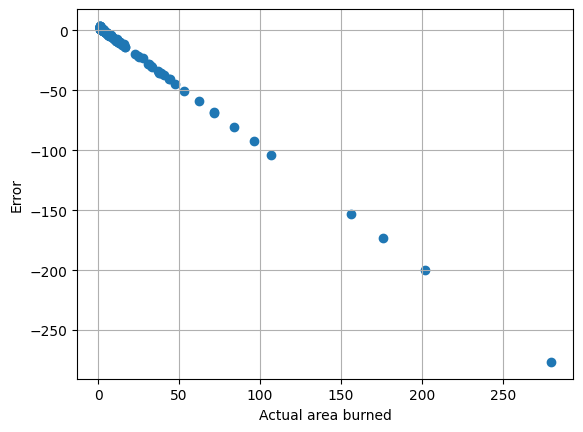

In [47]:
##Scatter plot to show actual area burned and error
plt.xlabel("Actual area burned")      # To print xlabel as actual area burned
plt.ylabel("Error")          # To print ylabel as error
plt.grid(True)     #plotting as a grid
plt.scatter(10**(y_test),10**(a)-10**(y_test))    ##plotting a Scatterplot

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          0.,   1.,   0.,   0.,   2.,   1.,   0.,   1.,   1.,   5.,   3.,
          3.,   4.,   2.,  15.,  28., 135.]),
 array([-276.57643903, -270.96933438, -265.36222972, -259.75512506,
        -254.14802041, -248.54091575, -242.93381109, -237.32670644,
        -231.71960178, -226.11249712, -220.50539247, -214.89828781,
        -209.29118315, -203.6840785 , -198.07697384, -192.46986918,
        -186.86276453, -181.25565987, -175.64855521, -170.04145056,
        -164.4343459 , -158.82724124, -153.22013659, -147.61303193,
        -142.00592727, -136.39882262, -130.79171796, -125.1846133 ,
        -119.57750865, -113.97040399, -108.36329933, -102.75619468,
         -97.14909002,  -91.54198537,  -85.93488071,  -80.32777605,
         -74.7206714 ,  -69.11356674,  -63.506

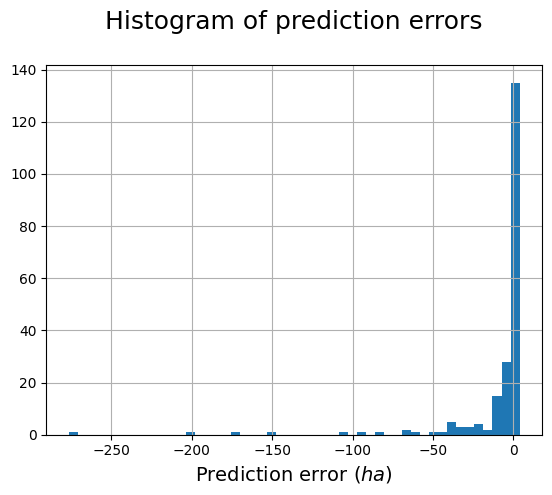

In [48]:
plt.title("Histogram of prediction errors\n",fontsize=18)     ##Title to the plot
plt.xlabel("Prediction error ($ha$)",fontsize=14)    ## xlabel as prediction error
plt.grid(True)    ##plotting as a grid
plt.hist(10**(a.reshape(a.size,))-10**(y_test),bins=50)   ##plotting a histogram

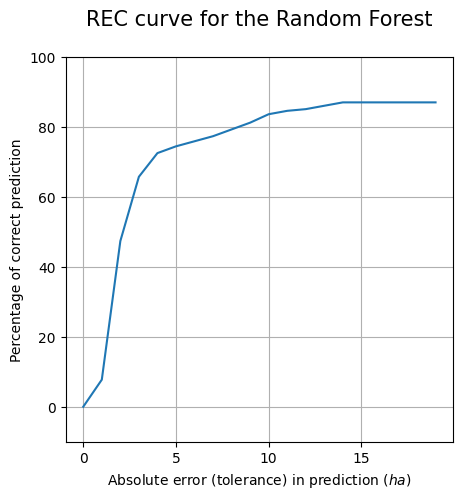

In [49]:
rec_RF=[]
for i in range(tol_max):
    rec_RF.append(rec(a,y_test,i))

plt.figure(figsize=(5,5))    #Assessing a size to the plot
plt.title("REC curve for the Random Forest\n",fontsize=15)   #title of the plot
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")   #assessing x label as absolute error
plt.ylabel("Percentage of correct prediction")   # assessing ylabel as percentage of correct prediction
plt.xticks([i for i in range(0,tol_max+1,5)])
plt.ylim(-10,100)    # giving a y limit as -10 to 100
plt.yticks([i*20 for i in range(6)])
plt.grid(True)    #plotting as a grid
plt.plot(range(tol_max),rec_RF)

In [50]:
from keras.models import Sequential      #Importing sequential from keras.model
import keras.optimizers as opti          #Importing opti from keras.optimizers
from keras.layers import Dense, Activation,Dropout    #Importing Dense,Activation,Dropout from keras.layers

In [51]:
model = Sequential()   #Sequential model
model.add(Dense(100, input_dim=12))    #adding dense to the model
model.add(Activation('selu'))   #adding activation of 'selu' to the model
model.add(Dropout(0.3))   #adding dropout as 0.3 to the model
model.add(Dense(100))   #adding dense as 100 to the model
model.add(Dropout(0.3))    #Adding dropout 0.3 to the model
model.add(Activation('selu'))  #adding activation 'selu' to the model
model.add(Dense(50))    #adding dense as 50 to the model
model.add(Activation('elu'))   #adding activation 'elu' to the model
model.add(Dense(1))   #adding dense as 1 to the model
model.summary()   ##Displaying the summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1300      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 activation_1 (Activation)   (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                5

In [53]:
learning_rate=0.001   #assigning a learning rate
optimizer = opti.RMSprop(lr=learning_rate)  #optimizing the learning rate
model.compile(optimizer=optimizer,loss='mse')  #compiling the model with optimizer and loss 'mse'

In [56]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model = Sequential([
    Dense(32, input_shape=(12,), activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [60]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model = Sequential([
    Dense(32, input_shape=(12,), activation='relu'),
    Dense(1)
])


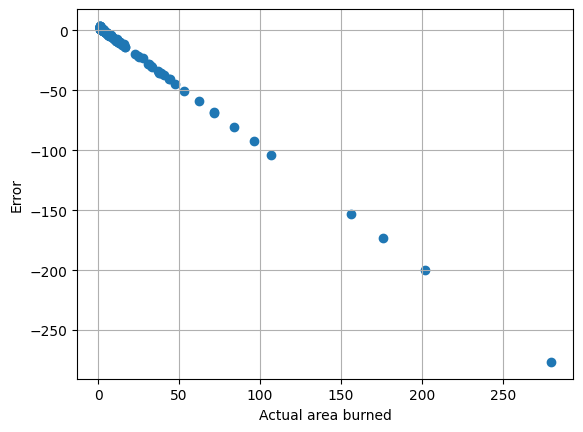

In [61]:
plt.xlabel("Actual area burned")   # To print xlabel as actual area burned
plt.ylabel("Error")    # To print ylabel as error
plt.grid(True)     #plotting as a grid
plt.scatter(10**(y_test),10**(a.reshape(a.size,))-10**(y_test))   ##Plotting a scatterplot

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          0.,   1.,   0.,   0.,   2.,   1.,   0.,   1.,   1.,   5.,   3.,
          3.,   4.,   2.,  15.,  28., 135.]),
 array([-276.57643903, -270.96933438, -265.36222972, -259.75512506,
        -254.14802041, -248.54091575, -242.93381109, -237.32670644,
        -231.71960178, -226.11249712, -220.50539247, -214.89828781,
        -209.29118315, -203.6840785 , -198.07697384, -192.46986918,
        -186.86276453, -181.25565987, -175.64855521, -170.04145056,
        -164.4343459 , -158.82724124, -153.22013659, -147.61303193,
        -142.00592727, -136.39882262, -130.79171796, -125.1846133 ,
        -119.57750865, -113.97040399, -108.36329933, -102.75619468,
         -97.14909002,  -91.54198537,  -85.93488071,  -80.32777605,
         -74.7206714 ,  -69.11356674,  -63.506

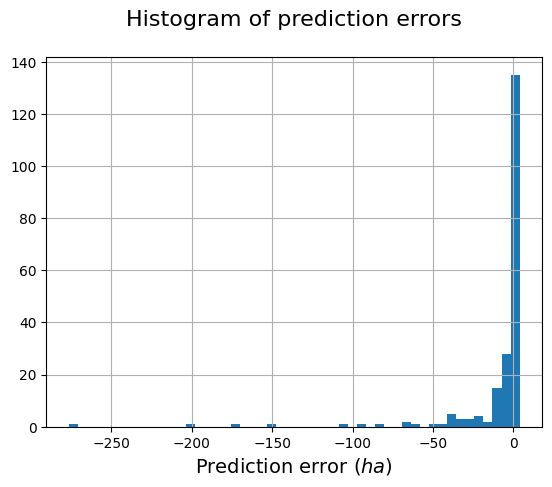

In [62]:
plt.title("Histogram of prediction errors\n",fontsize=16)   ##Title to the plot
plt.xlabel("Prediction error ($ha$)",fontsize=14)   ##xlabel as prediction error
plt.grid(True)   #plotting as a grid
plt.hist(10**(a.reshape(a.size,))-10**(y_test),bins=50)  #plotting a histogram

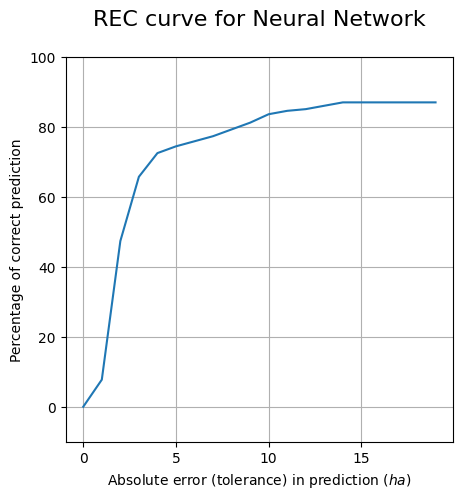

In [63]:
rec_NN=[]   #defining rec
for i in range(tol_max):
    rec_NN.append(rec(a,y_test,i))
plt.figure(figsize=(5,5))  #assigning the size to the figure
plt.title("REC curve for Neural Network\n",fontsize=16)   ##title to the rec curve with font size 16
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")   #plotting with x label as absolute error
plt.ylabel("Percentage of correct prediction")   #plotting with y label as percentahe of correct prediction
plt.xticks([i for i in range(0,tol_max+1,5)]) 
plt.ylim(-10,100)   #assigning a limit for y
plt.yticks([i*20 for i in range(6)])
plt.grid(True)   #plotting a grid
plt.plot(range(tol_max),rec_NN)

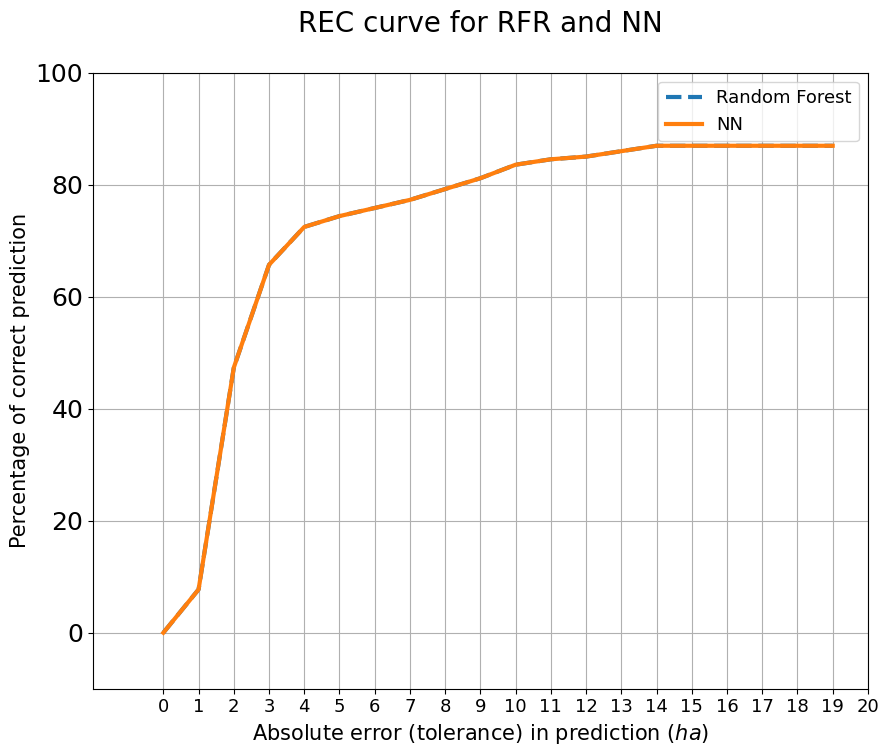

In [64]:
### Relative performance of random forest and nn
plt.figure(figsize=(10,8))    #plotting figure with size 10,8
plt.title("REC curve for RFR and NN\n",fontsize=20)  #title to the rec curve for rfr and nn
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)",fontsize=15)   #Plotting x label as absolute error(tolerance)in prediction
plt.ylabel("Percentage of correct prediction",fontsize=15)   #Plotting y label as percentage of correct prediction
plt.xticks([i for i in range(0,tol_max+1,1)],fontsize=13)
plt.ylim(-10,100)   #assigning a y limit
plt.xlim(-2,tol_max)   #assigning a x limit
plt.yticks([i*20 for i in range(6)],fontsize=18)
plt.grid(True)  #plotting as a grid
plt.plot(range(tol_max),rec_RF,'--',lw=3)
plt.plot(range(tol_max),rec_NN,'-',lw=3)
plt.legend(['Random Forest','NN'],fontsize=13)   #Plotting rfr and nn

In [65]:
from sklearn.linear_model import LinearRegression   #Importing linear regression package from sklearn.linear_model
lm = LinearRegression()   #Creating an object to linear regression
lm.fit(X, y)   ##Fitting the model

LinearRegression()

In [66]:
## Print intercept and coefficient
print(lm.intercept_)
print(lm.coef_)

-0.016301079305967137
[ 1.72292181e-02  6.69901398e-03  2.69631741e-03  7.48785827e-04
  6.36404660e-05 -9.68743414e-03  1.94408920e-03 -2.28049223e-03
  3.46899936e-02  3.60202136e-02  6.73583831e-03]


In [67]:
(1.74449208e-02 * 54.29) + (-0.05086798058566372)  ##y = mx+c
#m value--> coefficient(1.74449208e-02)
#c value--> intercept(-0.05086798058566372)

0.8962167696463363

In [68]:
y_pred = lm.predict(X)  ### With help of predict, we are going to find our predicted values
y_pred

array([ 0.5256449 ,  0.43788565,  0.45249946,  0.33970193,  0.26041204,
        0.53420585,  0.52591501,  0.35484804,  0.62354149,  0.59473922,
        0.67094134,  0.43298395,  0.48740242,  0.53230373,  0.65990162,
        0.59424004,  0.50923837,  0.58433546,  0.45575247,  0.39769613,
        0.54458263,  0.47814369,  0.06373756,  0.57927235,  0.50978314,
        0.50867751,  0.62754336,  0.49423622,  0.60705968,  0.59333513,
        0.50881002,  0.57283469,  0.47925556,  0.52563213,  0.50643944,
        0.52070628,  0.56655895,  0.50382601,  0.55936747,  0.3738554 ,
        0.45008855,  0.5278326 ,  0.39579871,  0.46679053,  0.47158011,
        0.52652588,  0.49365475,  0.45336986,  0.34954165,  0.47769975,
        0.50917453,  0.41695377,  0.47353207,  0.47353207,  0.4498196 ,
        0.53114728,  0.49706571,  0.38981261,  0.39016655,  0.18536929,
        0.40602459,  0.36609521,  0.42724633,  0.39406094,  0.42741903,
        0.44410773,  0.48383713,  0.51757019,  0.54879118,  0.45

In [69]:
y==y_pred   # Compare the actual with the predicted values

0      False
1      False
2      False
3      False
4      False
       ...  
512    False
513    False
514    False
515    False
516    False
Name: Log-area, Length: 517, dtype: bool

In [70]:
## r2_value--> to check the model performance
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.02700712976002706

In [71]:
from sklearn.metrics import mean_squared_error as mse   #Importing mean_squared_error as mse from sklearn.metrics
from sklearn.metrics import mean_absolute_error as mae  #Importing mean_absolute_error as mae from sklearn.metrics
print("mse=", mse(y,y_pred))  #Printing mean_squared_error as 'mse='
print("mae=", mae(y,y_pred))  #Printing mean_absolute_error as 'mae='

mse= 0.35819754307880214
mae= 0.493970925719884
